In [2]:
import torch
import torchio as tio
import numpy as np
import matplotlib.pyplot as plt 
import os

# global settings
base_path = '/mnt/data_lab513/vqtran_data'
root_data = os.path.join(base_path, "data", "raw_data", "ADNI_NIfTI")
root_bias_correction = os.path.join(base_path, "data", "clean_data", "mri_bias_correction")
root_bet = os.path.join(base_path, "data", "clean_data", "mri_brain_extraction")
root_reg = os.path.join(base_path, "data", "clean_data", "mri_registration")
root_meta = os.path.join(base_path, "data", "meta_data")#, "Pre-Thesis_metadata", "ADNI") 
root_train = os.path.join(base_path, "data", "train_data")



READ IN NIFTI IMAGE AS NUMPY ARRAY

In [3]:
import nibabel as nib
sample_dir = os.path.join(root_reg,'ADNI_011_S_4912_MR_MPRAGE_br_raw_20130315145415974_174_S184571_I363474.nii.gz')
sample_img = nib.load(sample_dir)
sample_img_data = sample_img.get_fdata()
sample_img_data.shape #(182, 218, 182)
# sample_img_data.dtype  #dtype('float64')

(182, 218, 182)

CONVERT NUMPY ARRAY TO TORCH TENSOR

In [4]:
sample_image_tensor = torch.Tensor(sample_img_data)
print(sample_image_tensor.shape)
print(sample_image_tensor.dtype)

torch.Size([182, 218, 182])
torch.float32


SHOW_PLOT FUNCTIONS

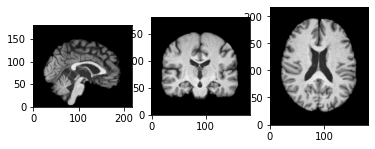

In [5]:
import matplotlib.pyplot as plt

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
         axes[i].imshow(slice.T, cmap="gray", origin="lower")
         
def create_and_show_slices(data_volume):
    if (len(data_volume.shape) == 4):
        print(data_volume.shape)
        img_data = torch.squeeze(data_volume,0)
    else:
        img_data = data_volume
        
    slice_0 = img_data[img_data.shape[0]//2, :, :]
    slice_1 = img_data[:, img_data.shape[1]//2, :]
    slice_2 = img_data[:, :, img_data.shape[2]//2]
    
    show_slices([slice_0, slice_1, slice_2])
    # plt.suptitle("Center slices for EPI image")  

create_and_show_slices(sample_image_tensor)





# TORCHIO

RESIZE

torch.Size([1, 110, 110, 110])
torch.Size([1, 110, 110, 110])


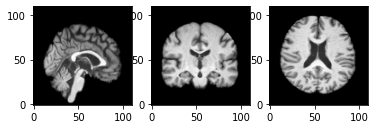

In [6]:
resize_transformation = tio.transforms.Resize((110,110,110))
resized_sample_image_tensor = resize_transformation(torch.unsqueeze(sample_image_tensor,0))
print(resized_sample_image_tensor.shape)
create_and_show_slices(resized_sample_image_tensor)

RANDOM FLIP

torch.Size([1, 110, 110, 110])
torch.Size([1, 110, 110, 110])
torch.Size([1, 110, 110, 110])
torch.Size([1, 110, 110, 110])


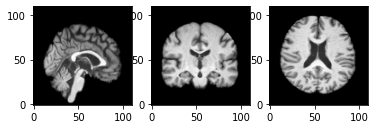

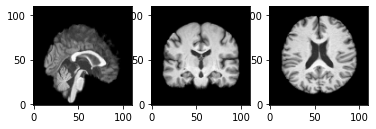

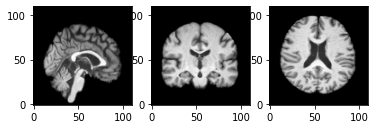

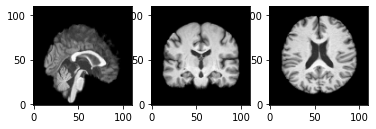

In [7]:
flip_augmentation = tio.RandomFlip(axes=('LR'))
# flip_augmentation = tio.RandomFlip(axes=("IS"))
# flip_augmentation = tio.RandomFlip(axes=("AP"))
for i in range(4):
    flipped_sample_image_tensor  = flip_augmentation(resized_sample_image_tensor)
    create_and_show_slices(flipped_sample_image_tensor) 
    

RANDOM ELASTIC DEFORMATION

torch.Size([1, 110, 110, 110])
torch.Size([1, 110, 110, 110])
torch.Size([1, 110, 110, 110])
torch.Size([1, 110, 110, 110])


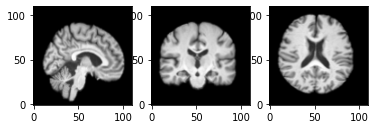

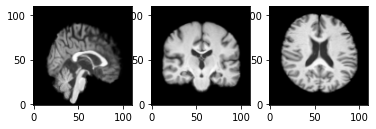

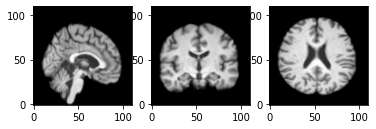

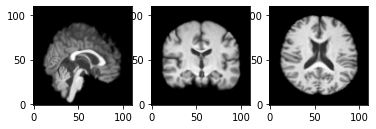

In [8]:
elastic_augmentation = tio.RandomElasticDeformation(
    num_control_points=(4, 4, 4),  # or just 7
    locked_borders=1
    )
for i in range(4):
    elastic_sample_image_tensor  = elastic_augmentation(resized_sample_image_tensor)
    create_and_show_slices(elastic_sample_image_tensor) 

RANDOM ANISOTROPY


In [9]:
# import torchio as tio
# transform = tio.RandomAnisotropy(axes=1, downsampling=2)
# transform = tio.RandomAnisotropy(
#     axes=(0, 1, 2),
#     downsampling=(2, 5),
# )   # Multiply spacing of one of the 3 axes by a factor randomly chosen in [2, 5]

# transformed = transform(resized_sample_image_tensor)
# create_and_show_slices(transformed)

RANDOM NOISE

torch.Size([1, 110, 110, 110])
torch.Size([1, 110, 110, 110])
torch.Size([1, 110, 110, 110])
torch.Size([1, 110, 110, 110])


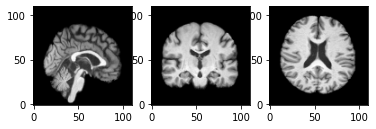

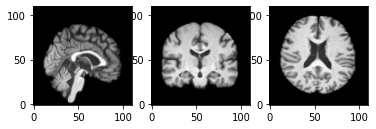

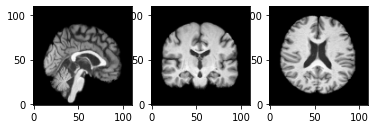

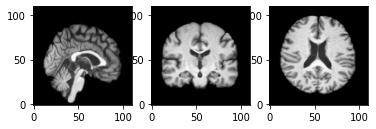

In [10]:
noise_augmentation = tio.RandomNoise()

for i in range(4):
    noised_sample_image_tensor  = noise_augmentation(resized_sample_image_tensor)
    create_and_show_slices(noised_sample_image_tensor) 
    

RANDOM GAMMA

torch.Size([1, 110, 110, 110])
torch.Size([1, 110, 110, 110])
torch.Size([1, 110, 110, 110])
torch.Size([1, 110, 110, 110])


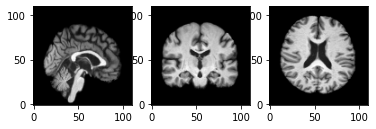

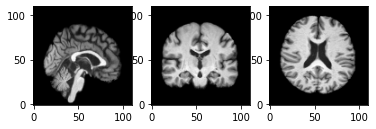

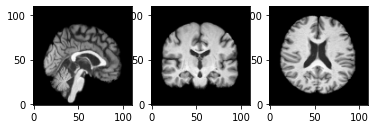

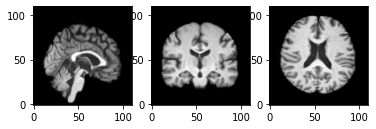

In [11]:
gamma_augmentation = tio.RandomGamma()

for i in range(4):
    gamma_sample_image_tensor  = gamma_augmentation(resized_sample_image_tensor)
    create_and_show_slices(gamma_sample_image_tensor) 

RESAMPLE TRANSFORMATION

torch.Size([1, 110, 110, 110])
torch.Size([1, 110, 110, 110])


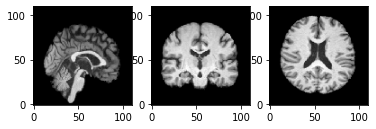

In [12]:
resample_transformation = tio.transforms.Resample(target=(182/110,218/110,182/110), image_interpolation="nearest") #interpolation="linear", "nearest"
resampled_sample_image_tensor = resample_transformation(torch.unsqueeze(sample_image_tensor,0))
print(resampled_sample_image_tensor.shape)
create_and_show_slices(resampled_sample_image_tensor)

# MONAI TRANSFORMATION

In [ ]:
import torch